In [2]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, chi2_contingency, shapiro, kruskal
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('turing_data.csv')

# Handle 'Not sure' responses by replacing 'NS' with NaN
data['Question 3'].replace('NS', np.nan, inplace=True)

questions_only = data[['Question 1', 'Question 2', 'Question 4']]

desc_stats_questions = questions_only.describe()

# Descriptive statistics for each set and across all sets
desc_stats_set1 = data[data['Set ID'] == 1]
set1_questions_only = desc_stats_set1.drop(['Participant ID', 'Set ID', 'Sample Number'], axis=1)
desc_stats_set1_questions = set1_questions_only.describe()

desc_stats_set2= data[data['Set ID'] == 2]
set2_questions_only = desc_stats_set2.drop(['Participant ID', 'Set ID', 'Sample Number'], axis=1)
desc_stats_set2_questions = set2_questions_only.describe()

print("Descriptive statistics for Set 1:")
print(desc_stats_set1_questions)
print("\nDescriptive statistics for Set 2:")
print(desc_stats_set2_questions)
print("\nDescriptive statistics for all sets:")
print(desc_stats_questions)

Descriptive statistics for Set 1:
       Question 1  Question 2  Question 4
count   50.000000   50.000000   50.000000
mean     3.380000    2.600000    2.560000
std      1.338443    1.665986    1.248019
min      1.000000    1.000000    1.000000
25%      2.250000    1.000000    1.000000
50%      3.000000    2.000000    3.000000
75%      5.000000    4.000000    3.000000
max      5.000000    5.000000    5.000000

Descriptive statistics for Set 2:
       Question 1  Question 2  Question 4
count   50.000000   50.000000   50.000000
mean     2.800000    2.440000    2.400000
std      1.212183    1.033322    1.106567
min      1.000000    1.000000    1.000000
25%      2.000000    2.000000    2.000000
50%      3.000000    2.500000    2.000000
75%      3.750000    3.000000    3.000000
max      5.000000    5.000000    5.000000

Descriptive statistics for all sets:
       Question 1  Question 2  Question 4
count  100.000000  100.000000  100.000000
mean     3.090000    2.520000    2.480000
std      1.

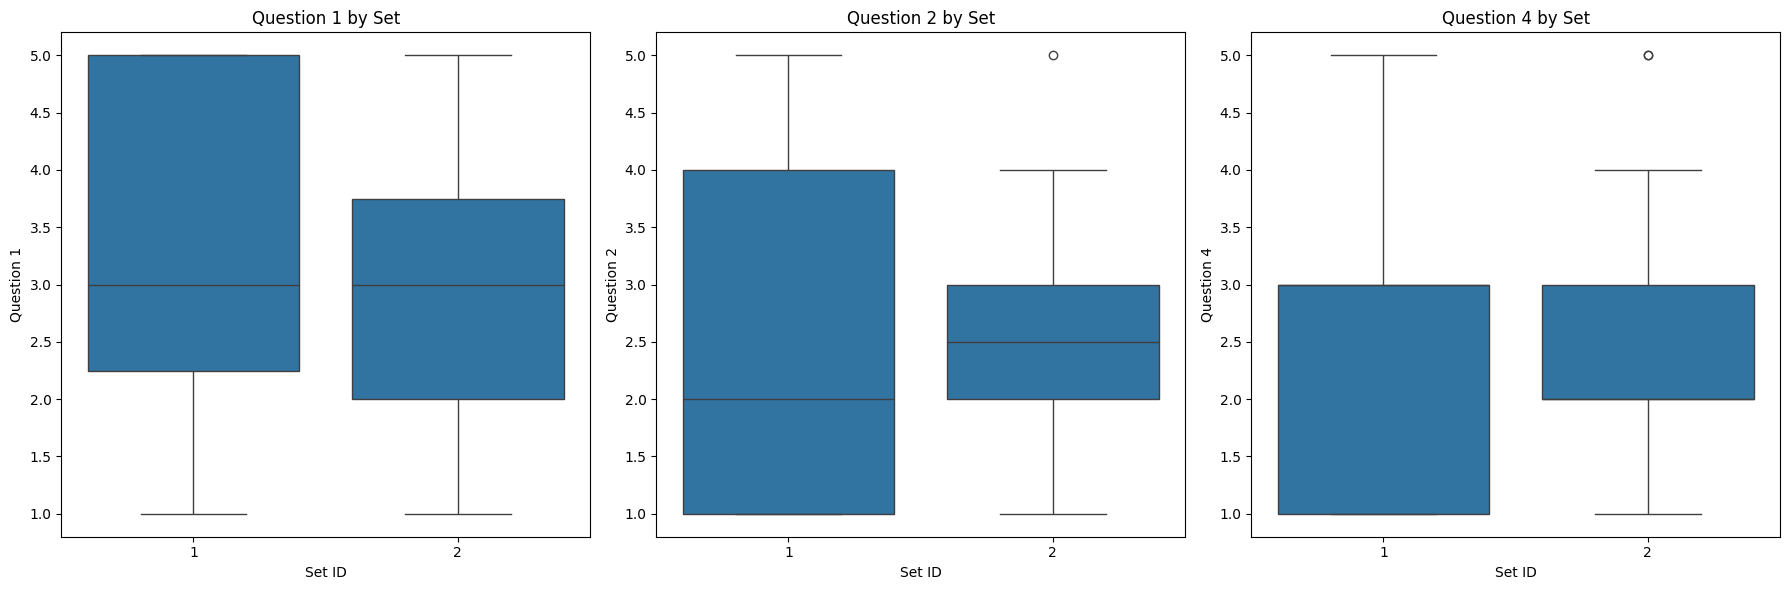

In [3]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='Set ID', y='Question 1', data=data)
plt.title('Question 1 by Set')

plt.subplot(1, 3, 2)
sns.boxplot(x='Set ID', y='Question 2', data=data)
plt.title('Question 2 by Set')

plt.subplot(1, 3, 3)
sns.boxplot(x='Set ID', y='Question 4', data=data)
plt.title('Question 4 by Set')

plt.tight_layout()
plt.show()

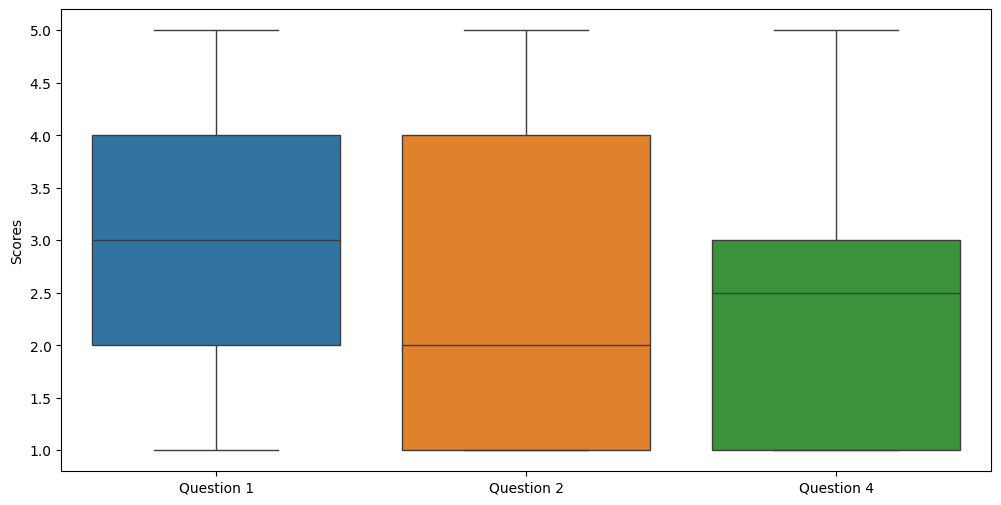

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Question 1', 'Question 2', 'Question 4']])
plt.ylabel('Scores')
plt.show()

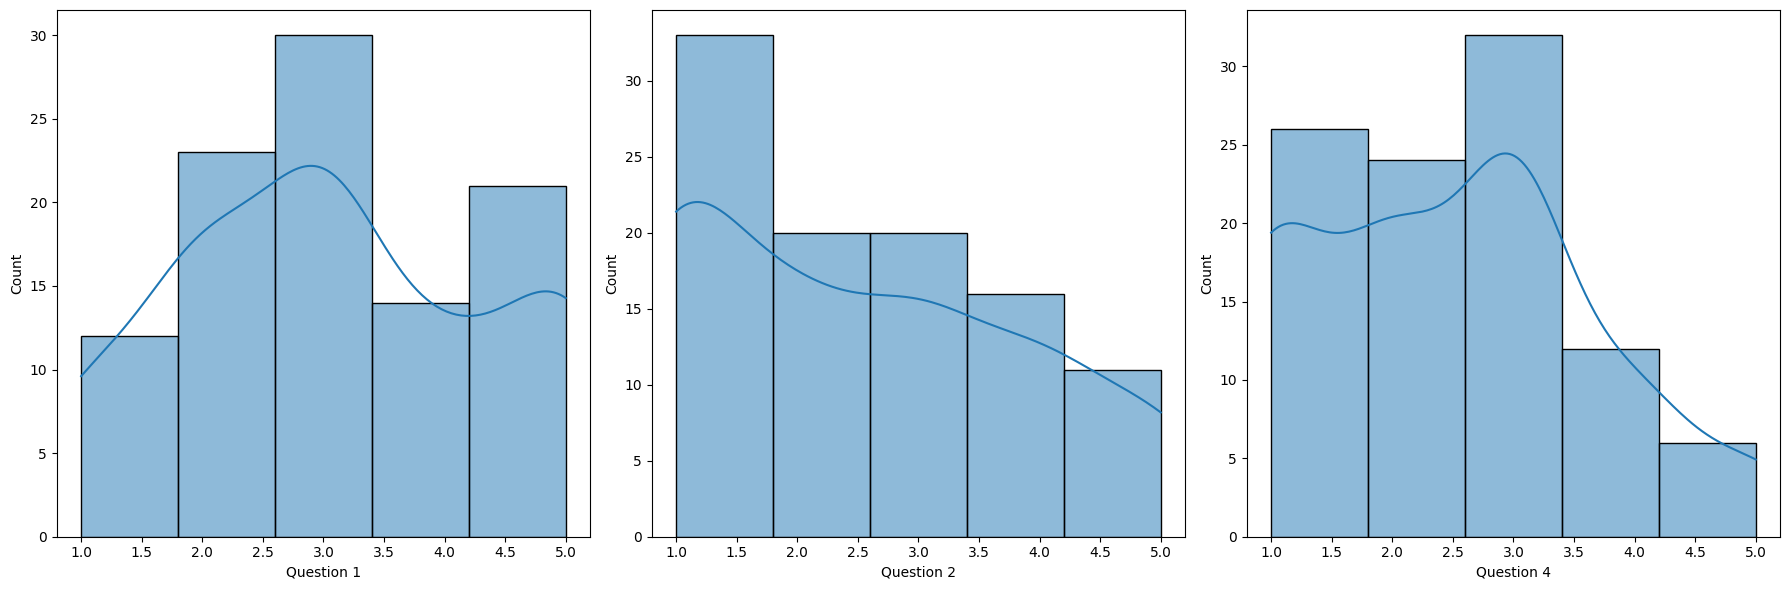

In [5]:
plt.figure(figsize=(18, 6))
for i, question in enumerate(['Question 1', 'Question 2', 'Question 4'], start=1):
    plt.subplot(1, 3, i)
    sns.histplot(data[question], kde=True, bins=5)
plt.tight_layout()
plt.show()

In [6]:
full_ai_scores = data[data['Question 3'] == 'AI']['Question 4']
full_human_scores = data[data['Question 3'] == 'H']['Question 4']

# Mann-Whitney U tests for Set 1 and Set 2
mw_stat_set1, mw_p_val_set1 = mannwhitneyu(
    full_ai_scores[data['Set ID'] == 1].dropna(),
    full_human_scores[data['Set ID'] == 1].dropna()
)

mw_stat_set2, mw_p_val_set2 = mannwhitneyu(
    full_ai_scores[data['Set ID'] == 2].dropna(),
    full_human_scores[data['Set ID'] == 2].dropna()
)

print(f"Mann-Whitney U test results for Set 1: U = {mw_stat_set1}, p-value = {mw_p_val_set1}")
print(f"Mann-Whitney U test results for Set 2: U = {mw_stat_set2}, p-value = {mw_p_val_set2}")

# Mann-Whitney U test across both sets
full_mw_stat, full_mw_p_val = mannwhitneyu(full_ai_scores.dropna(), full_human_scores.dropna())
print(f"Full Mann-Whitney U test results: U = {full_mw_stat}, p-value = {full_mw_p_val}")

# Test for normality
shapiro_test_ai = shapiro(full_ai_scores.dropna())
shapiro_test_human = shapiro(full_human_scores.dropna())

print(f"Shapiro test for AI: {shapiro_test_ai}")
print(f"Shapiro test for Human: {shapiro_test_human}")

Mann-Whitney U test results for Set 1: U = 27.5, p-value = 0.00025023398962792164
Mann-Whitney U test results for Set 2: U = 172.5, p-value = 0.1634616795781746
Full Mann-Whitney U test results: U = 350.5, p-value = 0.0003117111085246755
Shapiro test for AI: ShapiroResult(statistic=0.8188461065292358, pvalue=1.1455983440100681e-05)
Shapiro test for Human: ShapiroResult(statistic=0.921262800693512, pvalue=0.022499313578009605)


In [7]:
median_scores = data.groupby(['Set ID', 'Question 3'])['Question 4'].median().reset_index()

pivot_medians = median_scores.pivot(index='Question 3', columns='Set ID', values='Question 4')
pivot_medians['Difference'] = pivot_medians[2] - pivot_medians[1]

print(pivot_medians)

Set ID        1    2  Difference
Question 3                      
AI          1.5  2.0         0.5
H           4.0  3.0        -1.0


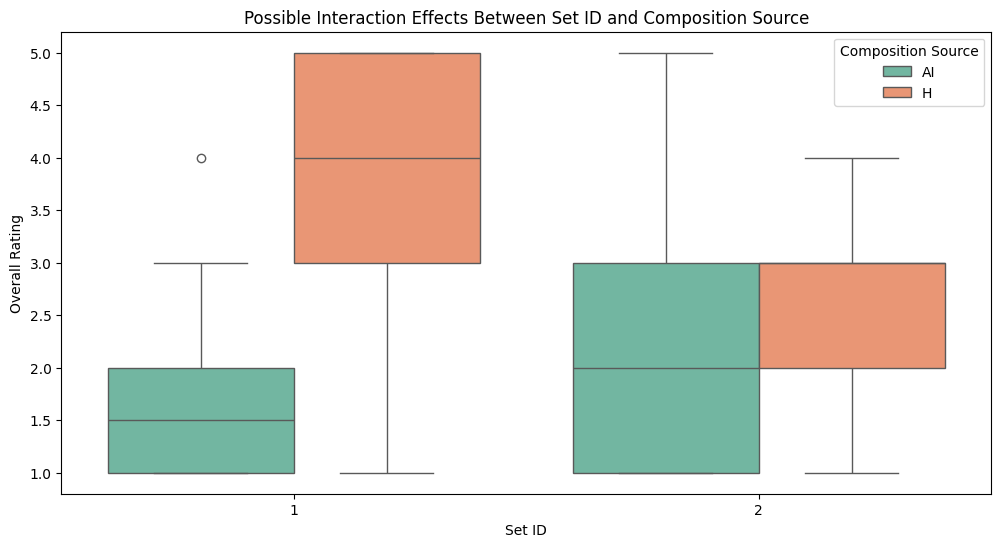

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Set ID', y='Question 4', hue='Question 3', data=data, palette='Set2')
plt.title('Possible Interaction Effects Between Set ID and Composition Source')
plt.xlabel('Set ID')
plt.ylabel('Overall Rating')
plt.legend(title='Composition Source')
plt.show()

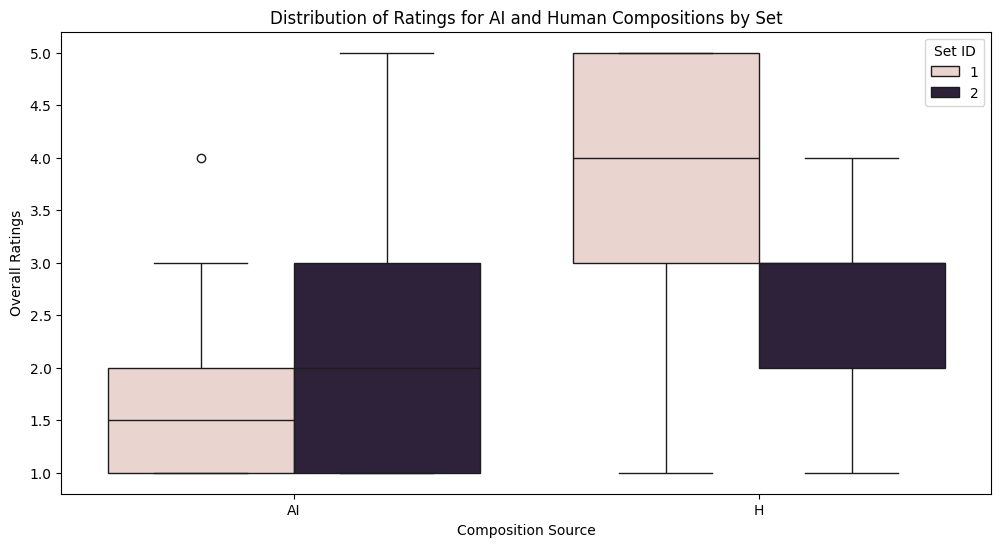

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Question 3', y='Question 4', hue='Set ID', data=data)
plt.title('Distribution of Ratings for AI and Human Compositions by Set')
plt.xlabel('Composition Source')
plt.ylabel('Overall Ratings')
plt.legend(title='Set ID')
plt.show()

In [10]:
# Spearman correlation
spearman_correlation = data[['Question 1', 'Question 2', 'Question 4']].corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(spearman_correlation)


Spearman Correlation Matrix:
            Question 1  Question 2  Question 4
Question 1    1.000000    0.501433    0.282554
Question 2    0.501433    1.000000    0.528069
Question 4    0.282554    0.528069    1.000000


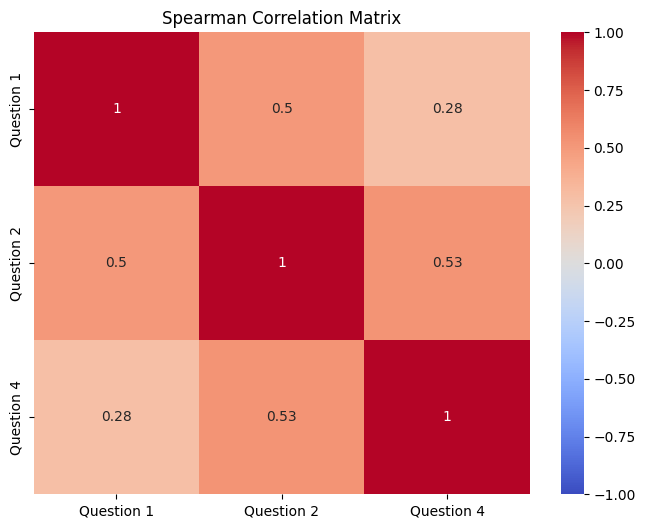

In [11]:
corr_matrix = data[['Question 1', 'Question 2', 'Question 4']].corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix')
plt.show()